In [115]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('random_mtsp.xls')

In [101]:
or_tools = df.iloc[:,1]
def parse_data(sub_df):
    data = []
    for datum in sub_df:
        try:
            perfs = [float(s) for s in re.findall("([0-9]+[,.]+[0-9]+)", datum)]
            data.append(perfs)
        except:
            pass
    return np.stack(data)

In [110]:
targer_index = 1 # 0: max makespan 1: mean makespan 2: mean util

or_tools = df.iloc[:,1]
or_tools_results = parse_data(or_tools)[:, targer_index]

snet = df.iloc[:,2]
snet_results = parse_data(snet)[:, targer_index]

FI = df.iloc[:,4]
FI_results = parse_data(FI)[:, targer_index]

NI = df.iloc[:,5]
NI_results = parse_data(NI)[:, targer_index]

NN = df.iloc[:,6]
NN_results = parse_data(NN)[:, targer_index]

RI = df.iloc[:,7]
RI_results = parse_data(RI)[:, targer_index]

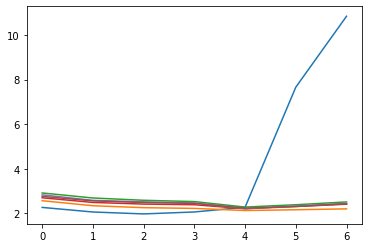

In [118]:
plt.plot(or_tools_results)
plt.plot(snet_results)
plt.plot(FI_results)
plt.plot(NI_results)
plt.plot(NN_results)
plt.plot(RI_results)